# 課題2(Optional) wikipediaリンクで遊ぼう

## Googleから10ステップ以内でいけるリンクを探してみる編

### 準備 

In [0]:
!pip install japanize-matplotlib

In [0]:
from google.colab import auth, drive, files, output
drive.mount('/content/drive')

In [0]:
import os
os.chdir("/content/drive/My Drive/STEP2020")

In [0]:
#pagesの読み込み
f1 = open('txt/wikipedia/pages.txt')
pages = f1.read()
f1.close()
n_pages = pages.split("\n")
pages = [n_pages[i].split("\t")[1] for i in range(len(n_pages)-1)] #最後に空行が入っていたので．
del n_pages[:]
#pages[:5] #確認用

In [0]:
#page名から番号を検索できるようにしておく．
pagename2num = dict()
for i in range(len(pages)):
    pagename2num[pages[i]] = i
#pagename2num #確認用

In [0]:
f1 = open('txt/wikipedia/links.txt')
links = f1.read()
f1.close()
n_links = links.split("\n")
links = [tuple(map(int, n_links[i].split('\t'))) for i in range(len(n_links)-1)] #最後に空行が入っていたので．
#メモリ解放
del n_links[:]

In [0]:
#隣接行列を作成
direct_neighbors = [[] for i in range(len(pages))]
for link in links:
    direct_neighbors[link[0]].append(link[1])
#direct_neighbors[:2] #確認用

In [0]:
del links[:]

### BFSで実装

In [73]:
import time
from collections import deque

def bfs(direct_neighbors, appended, start, n, G_ns, G_new_pages, G_times):
    q = deque()
    q.append(start)
    appended[start] = [True, 0]
    current_n = 0
    G_ns.append(0)
    G_new_pages.append(0)
    while len(q) > 0:
        current_node = q.popleft()
        if appended[current_node][1] == current_n:
            G_new_pages[-1] += 1
        else:
            G_times.append(time.time())
            G_new_pages.append(1)
            current_n += 1 
            G_ns.append(current_n)
        if current_n < n:
            for next_node in direct_neighbors[current_node]:
                if not appended[next_node][0]:
                    q.append(next_node)
                    appended[next_node] = [True, appended[current_node][1] + 1]

n = float('inf') #何リンク先まで探すか
start = pagename2num['Google']
appended = [[False, float('inf')] for i in range(len(pages))]
G_ns = []
G_new_pages = []
G_times = [time.time()]
bfs(direct_neighbors, appended, start, n, G_ns, G_new_pages, G_times)
G_times.append(time.time())
G_times = [G_times[i]-G_times[0] for i in range(1, len(G_times))]
G_total_pages = [sum(G_new_pages[:i+1]) for i in range(len(G_times))] #最初にstartをカウントしたのを抜く
for i in range(len(G_ns)):
    print('{}リンク先まで'.format(i))
    print('新たな出現ページ：', G_new_pages[i])
    print('累計出現ページ：', G_total_pages)
    print('累計計算時間：', G_times[i])
    print()

0リンク先まで
新たな出現ページ： 1
累計出現ページ： [1, 370, 26802, 453744, 967125, 1037687, 1042553, 1043080, 1043173, 1043210, 1043216, 1043218, 1043220, 1043222, 1043223, 1043224, 1043225]
累計計算時間： 0.0006403923034667969

1リンク先まで
新たな出現ページ： 369
累計出現ページ： [1, 370, 26802, 453744, 967125, 1037687, 1042553, 1043080, 1043173, 1043210, 1043216, 1043218, 1043220, 1043222, 1043223, 1043224, 1043225]
累計計算時間： 0.04814934730529785

2リンク先まで
新たな出現ページ： 26432
累計出現ページ： [1, 370, 26802, 453744, 967125, 1037687, 1042553, 1043080, 1043173, 1043210, 1043216, 1043218, 1043220, 1043222, 1043223, 1043224, 1043225]
累計計算時間： 1.5914249420166016

3リンク先まで
新たな出現ページ： 426942
累計出現ページ： [1, 370, 26802, 453744, 967125, 1037687, 1042553, 1043080, 1043173, 1043210, 1043216, 1043218, 1043220, 1043222, 1043223, 1043224, 1043225]
累計計算時間： 11.204956531524658

4リンク先まで
新たな出現ページ： 513381
累計出現ページ： [1, 370, 26802, 453744, 967125, 1037687, 1042553, 1043080, 1043173, 1043210, 1043216, 1043218, 1043220, 1043222, 1043223, 1043224, 1043225]
累計計算時間： 16.209908723831

In [0]:
#結果の可視化の準備
import seaborn as sns
import matplotlib.pyplot as plt
import japanize_matplotlib

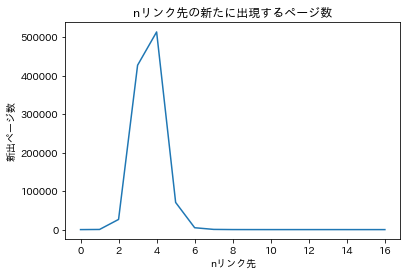

In [74]:
plt.title("nリンク先の新たに出現するページ数")
plt.xlabel("nリンク先")
plt.ylabel("新出ページ数")
plt.plot(G_ns, G_new_pages)

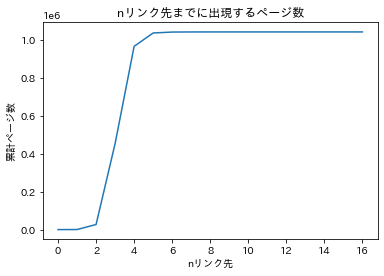

In [75]:
plt.title("nリンク先までに出現するページ数")
plt.xlabel("nリンク先")
plt.ylabel("累計ページ数")
plt.plot(G_ns, G_total_pages)

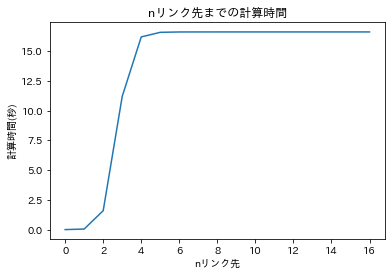

In [76]:
#意外と線形
plt.title("nリンク先までの計算時間")
plt.xlabel("nリンク先")
plt.ylabel("計算時間(秒)")
plt.plot(G_ns, G_times)

## あまり他のページと繋がっていそうなページと比較してみる編

In [62]:
tart = None
for i in range(len(pages)):
    if len(direct_neighbors[i]) == 1:
        start = i
        break
pages[start]

'SandBox'

In [72]:
import time
from collections import deque

def bfs(direct_neighbors, appended, start, n, S_ns, S_new_pages, S_times):
    q = deque()
    q.append(start)
    appended[start] = [True, 0]
    current_n = 0
    S_ns.append(0)
    S_new_pages.append(0)
    while len(q) > 0:
        current_node = q.popleft()
        if appended[current_node][1] == current_n:
            S_new_pages[-1] += 1
        else:
            S_times.append(time.time())
            S_new_pages.append(1)
            current_n += 1 
            S_ns.append(current_n)
        if current_n < n:
            for next_node in direct_neighbors[current_node]:
                if not appended[next_node][0]:
                    q.append(next_node)
                    appended[next_node] = [True, appended[current_node][1] + 1]

n = float('inf') #何リンク先まで探すか
start = pagename2num['Google']
appended = [[False, float('inf')] for i in range(len(pages))]
S_ns = []
S_new_pages = []
S_times = [time.time()]
bfs(direct_neighbors, appended, start, n, S_ns, S_new_pages, S_times)
S_times.append(time.time())
S_times = [S_times[i]-S_times[0] for i in range(1, len(S_times))]
S_total_pages = [sum(S_new_pages[:i+1]) for i in range(len(S_times))]
for i in range(len(S_ns)):
    print('{}リンク先まで'.format(i))
    print('新たな出現ページ：', S_new_pages[i])
    print('累計出現ページ：', S_total_pages[i])
    print('累計計算時間：', S_times[i])
    print()

0リンク先まで
新たな出現ページ： 1
累計出現ページ： 1
累計計算時間： 0.0006122589111328125

1リンク先まで
新たな出現ページ： 369
累計出現ページ： 370
累計計算時間： 0.04079127311706543

2リンク先まで
新たな出現ページ： 26432
累計出現ページ： 26802
累計計算時間： 1.6602540016174316

3リンク先まで
新たな出現ページ： 426942
累計出現ページ： 453744
累計計算時間： 11.134241342544556

4リンク先まで
新たな出現ページ： 513381
累計出現ページ： 967125
累計計算時間： 16.475218534469604

5リンク先まで
新たな出現ページ： 70562
累計出現ページ： 1037687
累計計算時間： 16.93110728263855

6リンク先まで
新たな出現ページ： 4866
累計出現ページ： 1042553
累計計算時間： 16.96516513824463

7リンク先まで
新たな出現ページ： 527
累計出現ページ： 1043080
累計計算時間： 16.968088388442993

8リンク先まで
新たな出現ページ： 93
累計出現ページ： 1043173
累計計算時間： 16.968509912490845

9リンク先まで
新たな出現ページ： 37
累計出現ページ： 1043210
累計計算時間： 16.968637704849243

10リンク先まで
新たな出現ページ： 6
累計出現ページ： 1043216
累計計算時間： 16.968660593032837

11リンク先まで
新たな出現ページ： 2
累計出現ページ： 1043218
累計計算時間： 16.968667030334473

12リンク先まで
新たな出現ページ： 2
累計出現ページ： 1043220
累計計算時間： 16.968674182891846

13リンク先まで
新たな出現ページ： 2
累計出現ページ： 1043222
累計計算時間： 16.968679904937744

14リンク先まで
新たな出現ページ： 1
累計出現ページ： 1043223
累計計算時間： 16.968682289123535

15リンク

In [0]:
ns = [i+1 for i in range(11)]

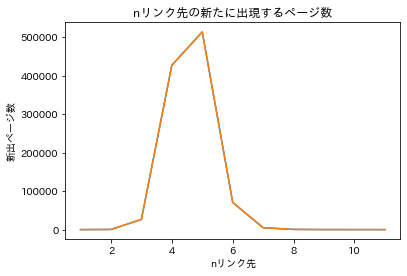

In [77]:
plt.title("nリンク先の新たに出現するページ数")
plt.xlabel("nリンク先")
plt.ylabel("新出ページ数")
plt.plot(ns, G_new_pages[:11], label='Google')
plt.plot(ns, S_new_pages[:11], label='SandBox')

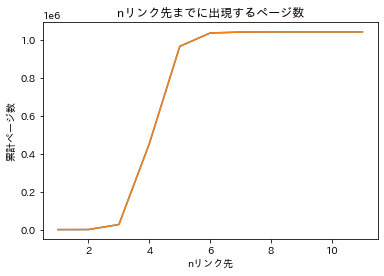

In [78]:
plt.title("nリンク先までに出現するページ数")
plt.xlabel("nリンク先")
plt.ylabel("累計ページ数")
plt.plot(ns, G_total_pages[:11], label='Google')
plt.plot(ns, S_total_pages[:11], label='SandBox')

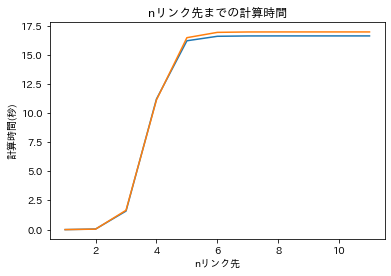

In [79]:
plt.title("nリンク先までの計算時間")
plt.xlabel("nリンク先")
plt.ylabel("計算時間(秒)")
plt.plot(ns, G_times[:11], label='Google')
plt.plot(ns, S_times[:11], label='SandBox')